In [1]:
import numpy as np
import scipy 
from scipy import io
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def add_one(X):
    d = X.shape[0]
    return np.hstack((np.ones((d,1)),X))

def normalize(X):
    return (X - X.mean(0))/X.std(0)

def costFunction(X, w,y,lambda_):
    n = X.shape[0]
    s = sigmoid(X.dot(w))
    J = -  np.sum(np.multiply(y,np.log(s))+np.multiply((1-y),np.log(1-s)))\
                + lambda_ *np.sum(np.multiply(w,w))
    return J

def predict(X,w):
    y_new = sigmoid(X.dot(w_new))
    y_pred = [0 if i<0.5 else 1 for i in y_new] 
    y_pred = np.array(y_pred)
    y_pred.shape = -1, 1
    return y_pred

def plot_n(sample_size,risk,label,title,a,b):
    plt.figure(figsize = (6,3))
    plt.plot(sample_size,risk,label = label,color= 'blue')
    #plt.plot(sample_sizes,QDA_error,label = 'QDA error',color= 'red')
    #plt.ylim(a,b)
    plt.ylabel('Risk')
    plt.title(title)
    plt.legend(loc=1)
    plt.savefig(''.join(label.split())+'.png')
    plt.show()

In [3]:
wine = scipy.io.loadmat('data.mat')
train = wine['X']
test = wine['X_test']
label = wine['y']
desc = wine['description']

data = np.hstack((train,label))
np.random.shuffle(data)

X = data[...,range(data.shape[1]-1)]
y = data[...,-1]
X = add_one(normalize(X))
y.shape = -1,1
X_test = add_one(normalize(test))

X_train = X[:5000,]
X_val = X[5000:,]
y_train = y[:5000,]
y_val = y[5000:,]
#lambda_ = 0.1
w_init = np.zeros((X_train.shape[1],1))

# Batch Gradient Descent

In [4]:
def batch_gradient(X,w,y,lambda_):
    n = X.shape[0]
    s = sigmoid(X.dot(w))
    w_new = np.vstack( (w[0], lambda_ * w[1:]))
    grad  =X.T.dot((y-s))+ w_new
    return grad 

def grad_descent1(X,y,iterations,alpha,lambda_):
    risk = []
    weight = []
    w = np.zeros((X.shape[1],1))
    for _ in range(iterations):
        w= w + alpha * batch_gradient(X, w,y,lambda_)
        r = costFunction(X,w,y,lambda_)
        risk.append(r)
        weight.append(w)
    return risk,weight

def grad_descent2(X,y,alpha,lambda_,coverge):
    risk = []
    weight = []
    w = np.zeros((X.shape[1],1))
    r = costFunction(X,w,y,lambda_)
    change_cost = 1
    i = 1
    while(change_cost > coverge):
        old_cost = r
        w= w +  alpha * batch_gradient(X, w,y,lambda_)
        r = costFunction(X,w,y,lambda_)
        risk.append(r)
        change_cost = old_cost - r
        i += 1
        weight.append(w)
    return risk,weight


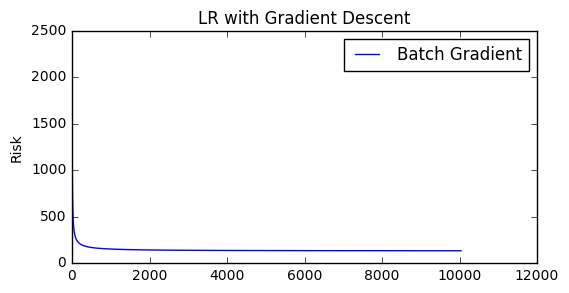

In [5]:
risk, weight = grad_descent2(X_train,y_train,0.0001,0.01,0.0001)
sample_size = [i for i in  range(1,len(risk)+1)]
plot_n(sample_size,risk,'Batch Gradient','LR with Gradient Descent',0,4000)

In [170]:
len(risk)

11698

In [165]:
risk, weight = grad_descent2(X,y,0.0001,0.01,0.0001)
w_new = weight[risk.index(min(risk))]
y_pred = predict(X_test,w_new)
np.savetxt('wine1.csv',y_pred,delimiter=',')

# Stochastic Gradient Descent

In [6]:
def stoch_gradient(X,w,y,lambda_):
    n = X.shape[0]
    s = sigmoid(X.dot(w))
    w_new = np.vstack( (w[0], lambda_ * w[1:]))
    grad =(y-s)*X + np.squeeze(w_new)
    grad.shape = -1,1
    return grad 


def stoch_gd(X,y,iterations,alpha,lambda_):
    risk = []
    weight = []
    w = np.zeros((X.shape[1],1))
    for _ in range(iterations):
        i = np.random.randint(0,X.shape[0])
        w= w + alpha * stoch_gradient(X[i,:], w,y[i],lambda_)
        r = costFunction(X,w,y,lambda_)
        risk.append(r)
        weight.append(w)
    return risk,weight

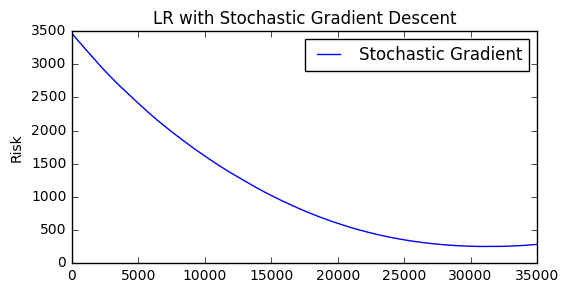

In [7]:
sample_size = [i for i in  range(1,35000+1)]
risk, weight = stoch_gd(X_train,y_train,35000,0.0001,0.7)
plot_n(sample_size,risk,'Stochastic Gradient','LR with Stochastic Gradient Descent',0,4000)

# Stochastic random gradient descent

In [8]:
def stoch_gd_random(X,y,iterations,lambda_):
    risk = []
    weight = []
    w = np.zeros((X.shape[1],1))
    for j in range(1,iterations):
        i = np.random.randint(0,X.shape[0])
        w= w + 0.001*1/j * stoch_gradient(X[i,:], w,y[i],lambda_)
        r = costFunction(X,w,y,lambda_)
        risk.append(r)
        weight.append(w)
    return risk,weight

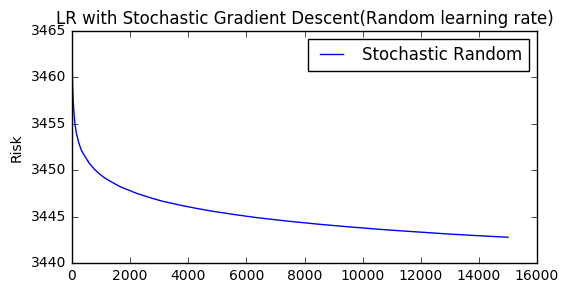

In [9]:
risk, weight = stoch_gd_random(X_train,y_train,15000,0.01)
sample_size = [i for i in  range(1,len(risk)+1)]

plot_n(sample_size,risk,'Stochastic Random','LR with Stochastic Gradient Descent(Random learning rate)',0,10000)

In [36]:
score = []
for n in np.arange(100,400,100):
    risk, weight = grad_descent(X_train,y_train,n,0.01,0.1)
    w_new = weight[risk.index(min(risk))]
    y_new = sigmoid(X_val.dot(w_new))
    y_pred = [0 if i<0.5 else 1 for i in y_new] 
    y_pred = np.array(y_pred)
    y_pred.shape = -1, 1
    s = np.sum(y_pred == y_val)/y_val.shape[0]
    score.append(1-s)

n_seq = np.arange(100,400,100)
s_new = n_seq[score.index(min(score))]